#  Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


#  Load the EMNIST Data

In [3]:
data = np.load("../data/emnist_letters.npz")
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

print("Training samples:", x_train.shape)
print("Testing samples:", x_test.shape)


Training samples: (88800, 28, 28, 1)
Testing samples: (14800, 28, 28, 1)


# Visualize Sample Data

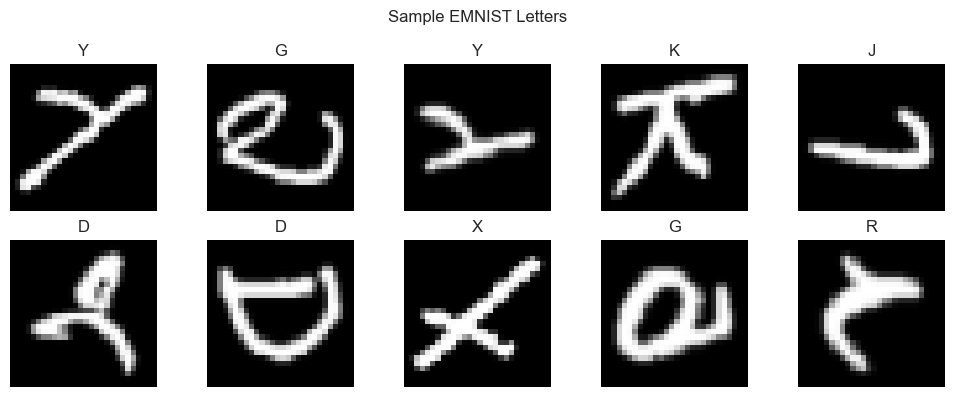

In [4]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
    plt.title(chr(y_train[i] + 65))  # A-Z
    plt.axis("off")
plt.suptitle("Sample EMNIST Letters")
plt.tight_layout()
plt.show()


# Build CNN Model

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(26, activation='softmax')  # 26 classes A-Z
])


D:\Handwritten Character Recognition using deep learning\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile Model

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,098 (887.10 KB)

 Trainable params: 227,098 (887.10 KB)

 Non-trainable params: 0 (0.00 B)

# Train the Model

In [7]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1, batch_size=128)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.6140 - loss: 1.2950 - val_accuracy: 0.8875 - val_loss: 0.3509
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.8679 - loss: 0.4135 - val_accuracy: 0.9120 - val_loss: 0.2740
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.8933 - loss: 0.3254 - val_accuracy: 0.9220 - val_loss: 0.2526
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9060 - loss: 0.2816 - val_accuracy: 0.9243 - val_loss: 0.2393
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.9155 - loss: 0.2491 - val_accuracy: 0.9284 - val_loss: 0.2254
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.9225 - loss: 0.2308 - val_accuracy: 0.9337 - val_loss: 0.2161
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.9273 - loss: 0.2125 - val_accuracy: 0.9310 - val_loss: 0.2166
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9319 - loss: 0.1940 - 

# Evaluate on Test Data

In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9226 - loss: 0.2284
Test Loss: 0.22853033244609833
Test Accuracy: 0.9238513708114624


# Confusion Matrix & Report

463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


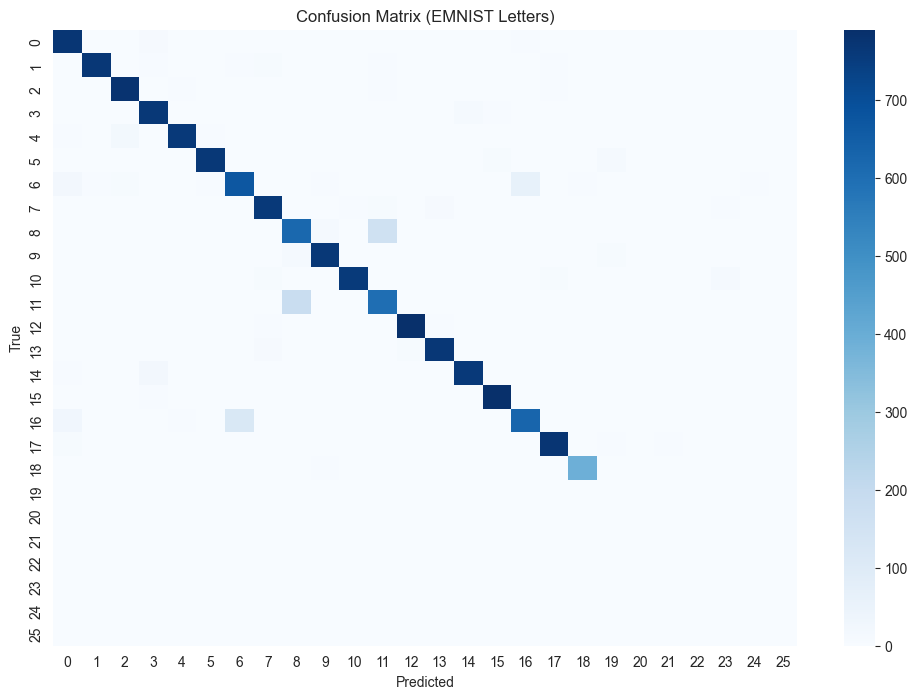


Classification Report:
              precision    recall  f1-score   support

           A       0.90      0.96      0.93       800
           B       0.98      0.96      0.97       800
           C       0.95      0.97      0.96       800
           D       0.93      0.95      0.94       800
           E       0.98      0.95      0.97       800
           F       0.98      0.96      0.97       800
           G       0.83      0.84      0.84       800
           H       0.95      0.95      0.95       800
           I       0.75      0.77      0.76       800
           J       0.97      0.96      0.96       800
           K       0.98      0.95      0.96       800
           L       0.76      0.75      0.76       800
           M       0.99      0.99      0.99       800
           N       0.97      0.96      0.96       800
           O       0.98      0.95      0.96       800
           P       0.97      0.98      0.98       800
           Q       0.89      0.79      0.84       800
   

D:\Handwritten Character Recognition using deep learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\Handwritten Character Recognition using deep learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\Handwritten Character Recognition using deep learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

In [9]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=False, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (EMNIST Letters)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=[chr(i + 65) for i in range(26)]))


# Save Model

In [10]:
model.save("../saved_models/emnist_alphabet_model.h5")
